# 4.  Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import xlsxwriter
import matplotlib.pyplot as plt
%matplotlib inline

Data cleaning is the process of ensuring data is correct, consistent and usable. In order to create a reliable dataset we need to adopt Data Cleaning method so that we can increase the quality of our data set. In our study we will go through following steps for cleaning our data:<br>
i) Missing value Treatment<br>
ii) Duplicate data Treatment<br>

# 4.1. Missing value Treatment, Removal of Duplicate Values GDP data

In [9]:
gdp_data=pd.read_csv(r"GDP Data.csv")
gdp_data.head(2)

,Year,GDP_at_Current_Prices
0,1980-81,1496.42
1,1981-82,1758.05


## 4.1.1. Missing Value Treatment:

In [12]:
#No of missing values in the data
gdp_data.isnull().sum()

Year                     0
GDP_at_Current_Prices    0
dtype: int64

Our data on GDP at Current Price does not contain any missing value. So, we don't need to take any remedial measure for it.

## 4.1.2. Detection and Removal of Duplicate data:

In [13]:
#No of duplicate rows in year column
gdp_data['Year'].duplicated().sum()

1

In [14]:
#Duplicate data in dataset
gdp_data.loc[gdp_data['Year'].duplicated(keep=False), :]

,Year,GDP_at_Current_Prices
31,2011-12,90097.21892
32,2011-12,87360.39000


It can be observed from the above analysis that the original data on GDP at Current Price contains duplicated rows. Here both the 31st and 32nd datapoints contain the data on GDP for 2011-12. In this case we will drop the 31st row and keep the 32nd row in our dataset.

In [15]:
#Removal of the duplicate data saving changes to original dataset
gdp_data.drop_duplicates(subset=['Year'],keep='last',inplace= True)

In [16]:
print(gdp_data.tail(10))

       Year  GDP_at_Current_Prices
30  2010-11               77841.16
32  2011-12               87360.39
33  2012-13               99513.44
34  2013-14              112727.64
35  2014-15              124882.05
36  2015-16              135760.86
37  2016-17              153916.69
38  2017-18              170983.04
39  2018-19              189712.37
40  2019-20              203398.49


In [17]:
gdp_data.shape

(40, 2)

Thus, we have succesfully got rid of the problem of duplicated row from the data on GDP at Current Price. 

## 4.2. Missing Value Treatment, Removal of Duplicate Data of the Regressor Variables

## 4.2.1. Missing Value Treatment:

In [2]:
regressor_data=pd.read_csv(r"Regressor Data.csv")
regressor_data.head(2)

,Year,Total_Foodgrains,Commercial_Crops,CrudeOil_POL_Prod_Imp,Total_Exports,Total_Imports,Tax_Reveneues,Total_Savings_Deposits,Fiscal_Deficit,Gross_Market_Borrowing,Liabilities_of_RBI,Total_Expenditures,Currenc_with_the_Public,Investments_by_LIC,Support_Price_for_Foodgrains,Price_of_Gold
0,1980-81,1295.9,8752.7,57,6710.71,125.4915,19763,10937,8299,3204,11844.0,37879,12364,5287.7,930.0,37.76
1,1981-82,1333.0,9376.6,72,7805.90,136.0755,24036,12995,8666,3698,13755.0,44479,13878,6020.5,NaN,509.23


In [3]:
#No of missing values in the data
regressor_data.isnull().sum()

  Year                          0
Total_Foodgrains                0
Commercial_Crops                2
CrudeOil_POL_Prod_Imp           0
Total_Exports                   0
Total_Imports                   0
Tax_Reveneues                   0
Total_Savings_Deposits          0
Fiscal_Deficit                  0
Gross_Market_Borrowing          0
Liabilities_of_RBI              0
Total_Expenditures              0
Currenc_with_the_Public         0
Investments_by_LIC              0
Support_Price_for_Foodgrains    1
Price_of_Gold                   0
dtype: int64

From the above analysis it can be realised that the data on Commercial_Crops contains two missing observations and the data on Support_Price_for_Foodgrains contain one missing observation.

### 4.2.1.a. Extrapolation of the values of Commercial_Crops

In [4]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]


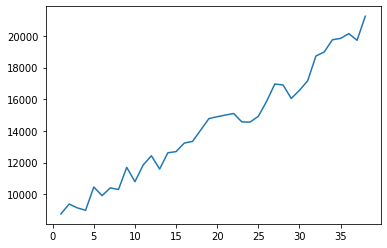

In [5]:
y=regressor_data['Commercial_Crops'].dropna()
plt.plot(x[0:38],y)

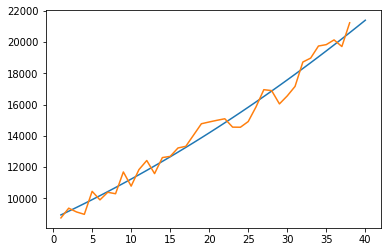

In [6]:
x_arg=x[0:38]
poly_coeff=np.polyfit(x_arg,y,2)
poly_coeff
y_fit=np.poly1d(poly_coeff)
x_new=x
plt.plot(x_new,y_fit(x_new))
plt.plot(x[0:38],y)

We have plotted the available observations on Commercial_Crops agains their respective time points. From the plot it can be realised that a second degree polynomial will be suitable to the data. So, we fitted a second degree polynomial to the data.

In [7]:
y_fit(38)

20611.37955465587

In [8]:
y_fit(39)

21008.542247510668

In [9]:
y=np.append(y,20611.379554655876)
y=np.append(y,21008.54224751067)
y

array([ 8752.7       ,  9376.6       ,  9134.2       ,  8982.1       ,
       10455.3       ,  9907.7       , 10394.1       , 10301.3       ,
       11695.7       , 10789.4       , 11847.        , 12428.1       ,
       11588.1       , 12617.2       , 12691.7       , 13231.2       ,
       13337.4       , 14058.4       , 14782.5       , 14896.1       ,
       15003.3       , 15101.8       , 14565.4       , 14558.9       ,
       14922.7       , 15863.2       , 16964.        , 16904.8       ,
       16053.2       , 16564.9       , 17172.8       , 18734.2       ,
       18986.2       , 19759.5       , 19848.7       , 20150.8       ,
       19727.3       , 21248.2       , 20611.37955466, 21008.54224751])

In [10]:
regressor_data['Commercial_Crops']=y
regressor_data.tail(5)

,Year,Total_Foodgrains,Commercial_Crops,CrudeOil_POL_Prod_Imp,Total_Exports,Total_Imports,Tax_Reveneues,Total_Savings_Deposits,Fiscal_Deficit,Gross_Market_Borrowing,Liabilities_of_RBI,Total_Expenditures,Currenc_with_the_Public,Investments_by_LIC,Support_Price_for_Foodgrains,Price_of_Gold
35,2015-16,2515.7,20150.800000,501,1716384.0,24903.06,2297101,2536544,520043,1033593,1535232.0,3760611,1474220,1817219.0,21860.0,2302.73
36,2016-17,2751.1,19727.300000,530,1849434.0,25776.75,2622145,3393583,517622,1106505,1475882.0,4265969,1382482,2055063.5,23735.0,2548.87
37,2017-18,2850.1,21248.200000,545,1956515.0,30010.33,3049468,3655237,583131,1166785,1611076.5,4515946,1546543,2313426.0,25535.0,2681.52
38,2018-19,2852.1,20611.379555,555,2307726.0,35946.75,3516888,4031177,643899,1258219,2040378.5,5516932,1910260,2552119.0,28160.0,2813.05
39,2019-20,2966.5,21008.542248,565,2218233.0,33557.62,3870520,4350746,761913,1562191,2402186.0,6071777,2161295,2809363.5,28925.0,3670.54


So, there is no missing observation any more in the Commercial_Crops.

### 4.2.1.b. Interpolation of the Values of Support_Price_of_Foodgrains

The second observation on Support_Price_of_Foodgrains i.e. the observation corresponding to the year 1981-1982 are missing. As the observations before and after the missing observations are available we can use the interpolation technique to estimate the misssing value in this case.

In [11]:
#Using Interpolation for Support_Price_for_Foodgrains
regressor_data['Support_Price_for_Foodgrains']=regressor_data['Support_Price_for_Foodgrains'].interpolate()
regressor_data['Support_Price_for_Foodgrains'].head(5)

0     930.0
1    1120.5
2    1311.0
3    1388.0
4    1249.0
Name: Support_Price_for_Foodgrains, dtype: float64

Hence, the estimated value corresponding to 1981-1982 is 1120.5

In [12]:
regressor_data.isnull().sum()

  Year                          0
Total_Foodgrains                0
Commercial_Crops                0
CrudeOil_POL_Prod_Imp           0
Total_Exports                   0
Total_Imports                   0
Tax_Reveneues                   0
Total_Savings_Deposits          0
Fiscal_Deficit                  0
Gross_Market_Borrowing          0
Liabilities_of_RBI              0
Total_Expenditures              0
Currenc_with_the_Public         0
Investments_by_LIC              0
Support_Price_for_Foodgrains    0
Price_of_Gold                   0
dtype: int64

Thus, the above reveals that our data does not contain any missing value anymore. 

## 4.2.2. Removal and Detection of Duplicate data:

The original data on regressors does not contain any duplicated row. So, we don't need to ake any remedial measure for it.

In [ ]:
#Detection of Duplicate data
gdp_data['Year'].duplicated().sum()

0

<br> Finally we can claim that we have succesfully cleaned the data sets on Regressors and the dataset on GDP at Current Prices by estimating the missing values and by removing the duplicated observations and the outliers.

In [172]:
Regression_Clean_data=regressor_data

In [175]:
Regression_Clean_Data['GDP_at_Current_Prices']=gdp_data['GDP_at_Current_Prices']

In [179]:
Regression_Clean_Data.shape

(40, 17)

In [183]:
import xlsxwriter

In [187]:
file = pd.ExcelWriter('Regression_Clean_Data.xlsx')
Regression_Clean_Data.to_excel(file)
file.save()

# 5. OLS Fitting and Preliminary Analysis of the Cleaned Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import shapiro
import pylab

In [2]:
regression_data=pd.read_csv(r"Regression_Clean_Data.csv")
regression_data.head(2)

,Year,Total_Foodgrains,Commercial_Crops,CrudeOil_POL_Prod_Imp,Total_Exports,Total_Imports,Tax_Reveneues,Total_Savings_Deposits,Fiscal_Deficit,Gross_Market_Borrowing,Liabilities_of_RBI,Total_Expenditures,Currenc_with_the_Public,Investments_by_LIC,Support_Price_for_Foodgrains,Price_of_Gold,GDP_at_Current_Prices
0,1980-81,1295.9,8752.7,57,31332.8,447.202,85033.5,49017.5,8299,10591.75,44708.5,158924.8,12364.0,5287.7,930.0,37.76,5651.41
1,1981-82,1333.0,9376.6,72,31332.8,447.202,85033.5,49017.5,8666,10591.75,44708.5,158924.8,13878.0,6020.5,1120.5,509.23,5651.41


In [3]:
X=regression_data[['Total_Foodgrains','CrudeOil_POL_Prod_Imp','Total_Exports','Total_Imports','Tax_Reveneues','Total_Savings_Deposits','Fiscal_Deficit','Gross_Market_Borrowing','Liabilities_of_RBI','Total_Expenditures','Currenc_with_the_Public','Investments_by_LIC','Support_Price_for_Foodgrains','Price_of_Gold','Commercial_Crops']]
Y=regression_data['GDP_at_Current_Prices']

In [4]:
X1=sm.add_constant(X)#to add constant value in the model for the intercept term

Here we have fitted an MLR model using Ordinary Least Square method.

In [5]:
model=sm.OLS(Y,X1).fit() 

In [6]:
predictions= model.summary()
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     GDP_at_Current_Prices   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 2.885e+04
Date:                   Tue, 20 Apr 2021   Prob (F-statistic):           2.62e-47
Time:                           09:19:19   Log-Likelihood:                -266.97
No. Observations:                     40   AIC:                             565.9
Df Residuals:                         24   BIC:                             593.0
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2376.4158    612.710     -3.879      0.001   -3640.988   -1111.844
Total_Foodgrains                -0.0118      0.582     -0.020      0.984      -1.212       1.189
CrudeOil_POL_Prod_Imp          -18.4927      5.180     -3.570      0.002     -29.184      -7.802
Total_Exports                   -0.0102      0.007     -1.509      0.144      -0.024       0.004
Total_Imports                   -0.0153      0.322     -0.048      0.962      -0.679       0.649
Tax_Reveneues                    0.0061      0.004      1.444      0.162      -0.003       0.015
Total_Savings_Deposits          -0.0033      0.003     -1.251      0.223      -0.009       0.002
Fiscal_Deficit                  -0.0020      0.002     -0.901      0.376      -0.006       0.003
Gross_Market_Borrowing          -0.0088      0.004     -2.025      0.054      -0.018       0.000
Liabilities_of_RBI               0.0680      0.012      5.563      0.000       0.043       0.093
Total_Expenditures               0.0147      0.004      3.479      0.002       0.006       0.023
Currenc_with_the_Public         -0.0007      0.001     -0.504      0.619      -0.004       0.002
Investments_by_LIC               0.0009      0.001      1.126      0.271      -0.001       0.003
Support_Price_for_Foodgrains     0.1823      0.118      1.540      0.137      -0.062       0.427
Price_of_Gold                   -0.3246      0.154     -2.103      0.046      -0.643      -0.006
Commercial_Crops                 0.4362      0.084      5.219      0.000       0.264       0.609
==============================================================================
Omnibus:                        3.484   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                1.778
Skew:                          -0.198   Prob(JB):                        0.411
Kurtosis:                       2.046   Cond. No.                     3.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test for significance of the regressors:
H₀:β₁=…..=β15=0  against
H₁:at least βj≠0 ; at least one j

F statistics = 2.885e+04
P_value = 2.62e-47 < 0.05,we reject the null hypothesis at 5% level of significance and conclude on the basis of the given data that all the variables are not insignificant in explaining the GDP data.

In [7]:
#Renaming for ease of graph plotting
dataframe = pd.concat([X, Y], axis=1)
model_fitted_Y = model.fittedvalues
model_residuals = model.resid    # model residuals
model_norm_residuals = model.get_influence().resid_studentized_internal  # normalized residuals

## 5.1.Inspection of the Normality Assumption of Errors 

## 5.1.a. Q-Q Plot:

In this method we would plot the the ordered residuals $e_{(i)}$ against $\Phi^{-1}(\frac{i-0.5}{n})$ , for i=1,2,...,n.If the errors are truely from Normal Distribution then the plot will be nearly a straight line.

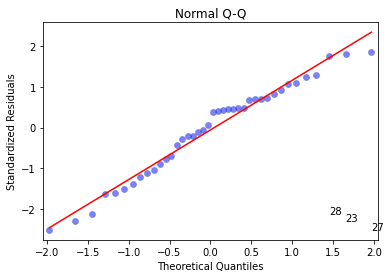

In [8]:
#Using Normal Q-Q Plot
QQ = ProbPlot(model_norm_residuals)
plot_2 = QQ.qqplot(line='r', alpha=0.5, color='#4C72B0', lw=1)
plot_2.axes[0].set_title('Normal Q-Q')
plot_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

The above Q-Q plot yields almost a straight line.So, it can be concluded that the residuals can be assumed to follow a Normal Distribution which supports our assumption. <br> But we will use others methods to get check our assumption.

## 5.1.b. Histogram Approach:

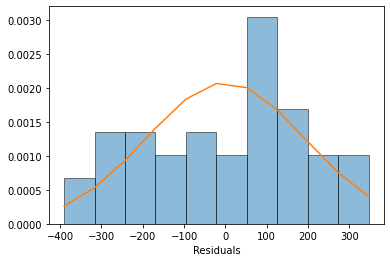

In [9]:
#Histogram approach of normality checking
_, bins, _ = plt.hist(model.resid,density=1,alpha=0.5,ec='k')
plt.xlabel('Residuals')
mu, sigma = stats.norm.fit(model.resid)
best_fit_line = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)

The histogram of Residuals is not significantly different from a Normal Curve. From here we could have concluded that our normality assumption for errors hold, but we will apply Shaipro-Wilk Test for Normality to get the final conclusion.

## 5.1.c. Shapiro-Wilk Test for Normality: 

Here the null hypothesis is,<br>
**H0**:Errors are normally distributed<br><br> The Alternative hypothesis is <br>**H1**:H0 is not true<br>
The test Statistic is: <br><br>
$W = \frac{\sum_{i=1}^{n}{a_{i}\hat{e_{(i)}}}}{\sum_{i=1}^{n}({\hat{e_{i}}-\bar{e}})^2}$ <br><br>
Here, $\hat{e_{i}}$ are the ith fitted residual<br>
$\hat{e_{(i)}}$ is the ith order statistic<br>
$\bar{e}$ is the sample mean<br>
$(a_{1},...,a_{n}) = \frac{m^{T}V^{-1}}{C}$<br>
And , $C=(m^{T}V^{-1}V^{-1}m)^{\frac{1}{2}}$<br>
Here m is made of the expected values of the order statistics of independent and identically distributed random variables sampled from the standard normal distribution; finally, V is the covariance matrix of those normal order statistics.If p-value is greater than chosen level of significance, null hypothesis is accepted(i.e.distribution of error is not significantly different from a normal population).

In [10]:
#Shapiro Wilk Test for normality
stat, p = shapiro(model.resid)

In [11]:
stat

0.9673185348510742

In [12]:
p

0.29499444365501404

Test statistic, W = 0.967, p-value = 0.294>0.05(α)<br> So we fail to reject the null hypothesis at 5% level of significance and conclude on the basis of the given data that the  distribution of errors is not significantly different from Normal Distribution. So, our assumption is true.


## 5.2. Inspection of Homoscedastic Assumptions of Errors

## 5.2.a. Residual vs Fitted Plot:

Here we plot the residuals against the fitted responses. If the errors are homoscedastic then we would expect a horizontal band and completely random pattern around $\hat{e_{i}} = 0 $ line. If any pattern is detected this will indicate that the variances may be non constant.

c:\users\s\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

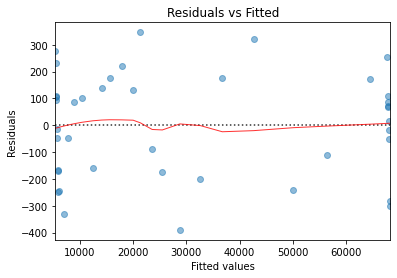

In [12]:
#Residual vs Fitted Plot
plot_1 = plt.figure()
plot_1.axes[0] = sns.residplot(model_fitted_Y,dataframe.columns[-1],data=dataframe,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_1.axes[0].set_title('Residuals vs Fitted')
plot_1.axes[0].set_xlabel('Fitted values')
plot_1.axes[0].set_ylabel('Residuals')

We have plotted the Residuals aginst the Fitted responses. We obtained a more or less random pattern among the residuals about the horizontal band. So we can conclude that, the assumption based on homoscedasticity is true in our Model.

## 5.2.b. Residual VS Each Regressor Plot 

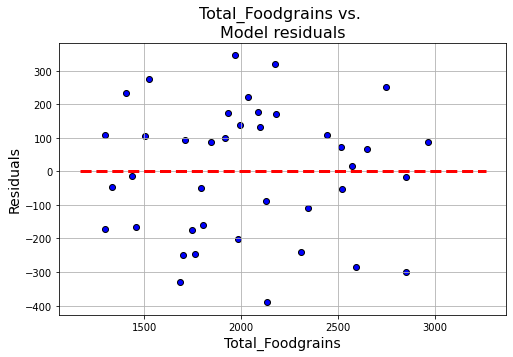

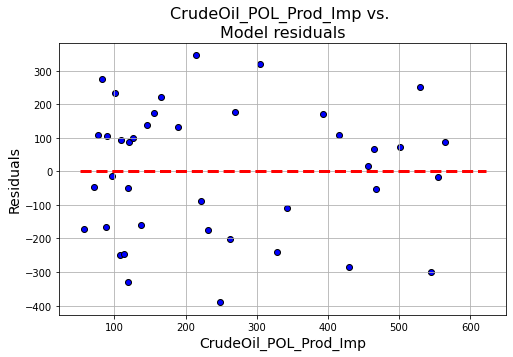

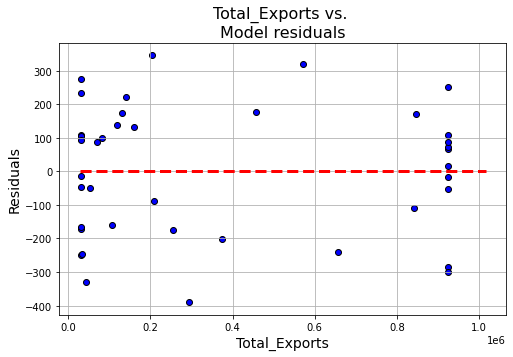

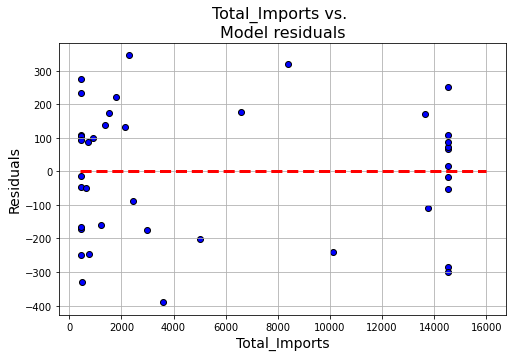

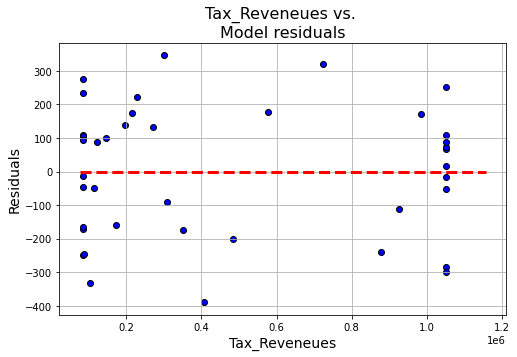

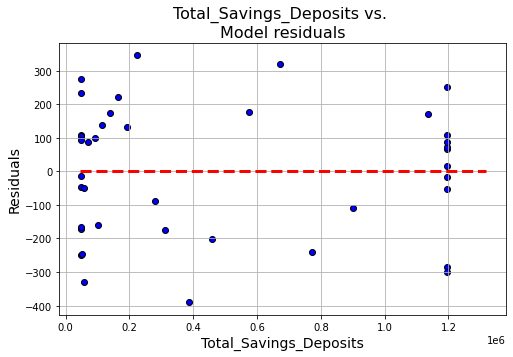

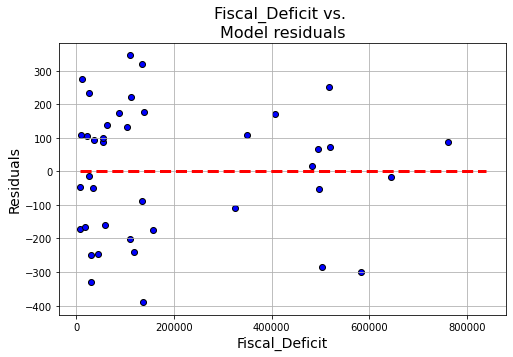

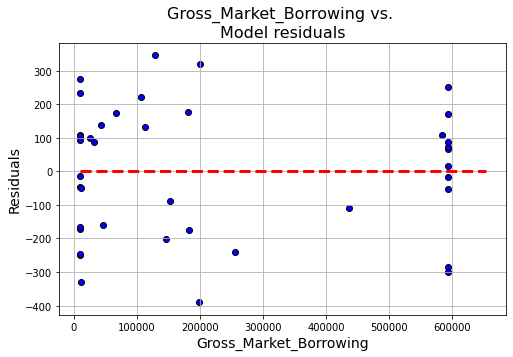

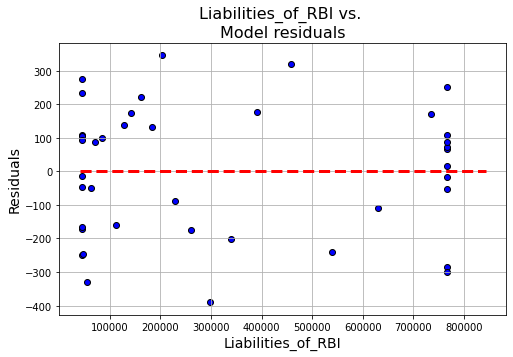

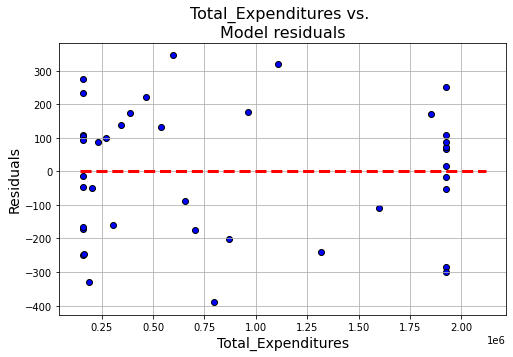

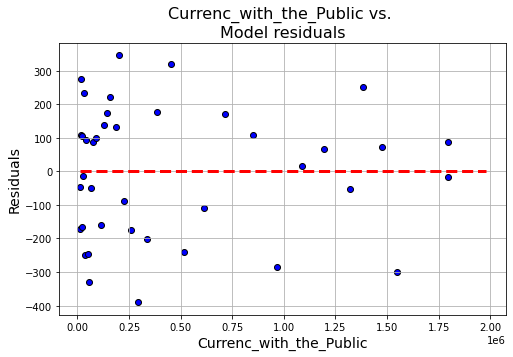

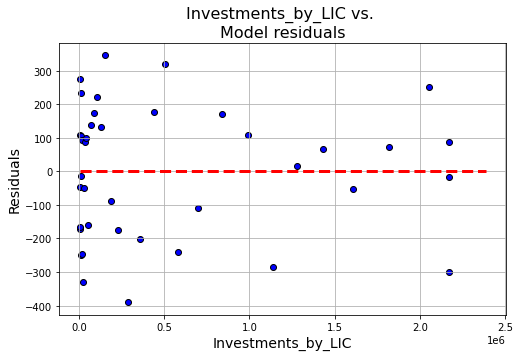

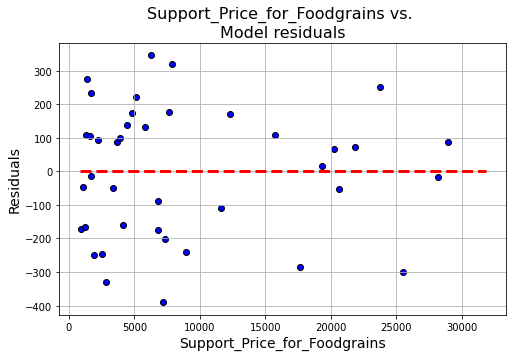

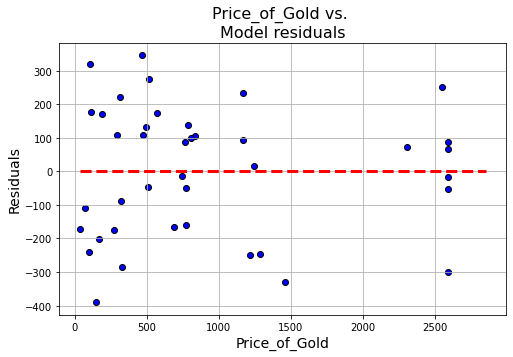

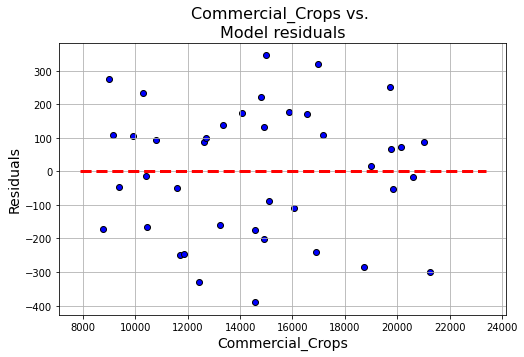

In [14]:
for c in dataframe.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=dataframe[c],y=model.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(dataframe[c])
    xmax = max(dataframe[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()

Hence we can observe that the residual v/s regressor plot for each regressor exhibits random behaviour which supports our previous conlusion about homoscedasticity of errors.

## 5.2.c. Breusch-Pagan Test for Heteroscedasticity

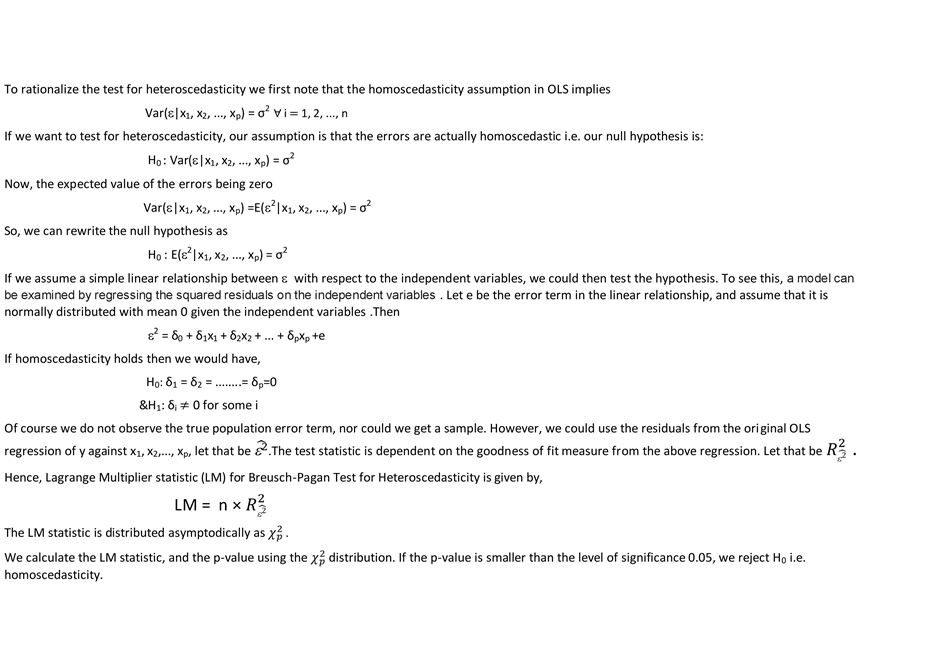

In [17]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [18]:
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(names, test)##Model Homoscedastic

[('Lagrange multiplier statistic', 18.09688221778359),
 ('p-value', 0.257606439712869),
 ('f-value', 1.3219584461150513),
 ('f p-value', 0.2632552221153009)]

p-value = 0.257>0.05(α)<br> So we fail to reject the null hypothesis at 5% level of significance and conclude on the basis of the given data that the  distribution of errors is not heteroscedastic. So, our assumption is true.


## 5.3. Inspection of Autocorrelation among the Errors

In our model the value of Durbin-Watson Statistic is d=1.880. It indicates that there may exist a positive correlation among the errors as 0<1.88<2. Hence we would like to test,<br> $H_{0}$ : ρ = 0 ag. $H_{1}$ : ρ > 0
For n=40, p=15, α=0.05, $d_{L}$=0.678, $d_{U}$=2.557. So, $d_{L}$<d<$d_{U}$ <br>
Since the exact Durbin Watson test becomes inconclusive, we use 
the modified Durbin Watson test. Here d < $d_{U}, so H0 is rejected.
i.e. there exists a positive autocorrelation among the errors.

**Remedy:** <br>We will fit the model with usual error assumption<br>  $Y_{i}$ =$β_{0}$ + $β_{1}$$X_{i1}$+ … + $β_{p}$$X_{ip}$ +γ$Y_ {i-1}$+ $ϵ_{i}$,   i=2(1)n 

In [16]:
data=regression_data.drop(index=0)
X_new=data[['Total_Foodgrains','CrudeOil_POL_Prod_Imp','Total_Exports','Total_Imports','Tax_Reveneues','Total_Savings_Deposits','Fiscal_Deficit','Gross_Market_Borrowing','Liabilities_of_RBI','Total_Expenditures','Currenc_with_the_Public','Investments_by_LIC','Support_Price_for_Foodgrains','Price_of_Gold','Commercial_Crops']]
data.head(2)
Y_new=data['GDP_at_Current_Prices']
Y1=regression_data['GDP_at_Current_Prices'].drop(index=39)
index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
ind=pd.DataFrame(index)
Y1=pd.concat([ind,Y1],axis=1)
Y1=Y1.set_index(Y1[0])
Y1=Y1['GDP_at_Current_Prices']
X=pd.concat([X_new,Y1],axis=1)
X1=sm.add_constant(X)
model= sm.OLS(Y_new,X1).fit() 
predictions= model.summary()
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     GDP_at_Current_Prices   R-squared:                       1.000
Model:                               OLS   Adj. R-squared:                  1.000
Method:                    Least Squares   F-statistic:                 2.505e+04
Date:                   Wed, 14 Apr 2021   Prob (F-statistic):           4.34e-43
Time:                           19:26:15   Log-Likelihood:                -260.10
No. Observations:                     39   AIC:                             554.2
Df Residuals:                         22   BIC:                             582.5
Df Model:                             16                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -2240.5376    651.414     -3.440      0.002   -3591.487    -889.589
Total_Foodgrains                -0.0150      0.608     -0.025      0.981      -1.275       1.245
CrudeOil_POL_Prod_Imp          -20.1193      7.065     -2.848      0.009     -34.770      -5.468
Total_Exports                   -0.0105      0.007     -1.469      0.156      -0.025       0.004
Total_Imports                   -0.0266      0.355     -0.075      0.941      -0.764       0.711
Tax_Reveneues                    0.0063      0.004      1.408      0.173      -0.003       0.015
Total_Savings_Deposits          -0.0035      0.003     -1.192      0.246      -0.010       0.003
Fiscal_Deficit                  -0.0018      0.002     -0.787      0.440      -0.006       0.003
Gross_Market_Borrowing          -0.0092      0.004     -2.064      0.051      -0.019    4.49e-05
Liabilities_of_RBI               0.0678      0.013      5.333      0.000       0.041       0.094
Total_Expenditures               0.0151      0.005      3.217      0.004       0.005       0.025
Currenc_with_the_Public         -0.0007      0.002     -0.446      0.660      -0.004       0.002
Investments_by_LIC               0.0011      0.001      1.269      0.218      -0.001       0.003
Support_Price_for_Foodgrains     0.1758      0.137      1.283      0.213      -0.108       0.460
Price_of_Gold                   -0.3533      0.164     -2.160      0.042      -0.693      -0.014
Commercial_Crops                 0.4344      0.091      4.759      0.000       0.245       0.624
GDP_at_Current_Prices            0.0082      0.049      0.169      0.867      -0.092       0.109
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.587
Skew:                          -0.184   Prob(JB):                        0.452
Kurtosis:                       2.083   Cond. No.                     3.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this case to detect the presence of autocorrelation we need to use Durbin's h Test.
<br> $H_{0}$ : $\rho = 0$   vs $H_{1} : Not H_{0}$ <br>
The test statistic is given by<br>
$$h = \hat\rho \sqrt{\frac{40}{1-(40* V(\hat\gamma))}}$$
<br>We will reject the Null hypothesis at 5% level of significnce if the observed h<-1.9596 or h>1.95996
<br> Now, $\hat\rho=1-\frac{d}{2}=1-\frac{2.010}{2}=-0.005$
<br> So, h=-0.033
<br> Hence the absolute value of h is less that 1.95996, So we accept the Null Hypothesis at 5% level of Significance and conclude on the bais of the given data that the errors in our new model are independent.
